In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import datetime
import math
style.use('ggplot')

In [2]:
df = pd.read_csv('covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Infected'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
Results = ['Infected', 'Confirmed', 'Deaths', 'Recovered']
df1 = df.groupby('ObservationDate').agg({'Country/Region' : 'nunique','Confirmed' : 'sum','Deaths' : 'sum','Recovered' : 'sum','Infected' : 'sum',})
df1.head()
df1.tail()
##df1.columns.values

,Country/Region,Confirmed,Deaths,Recovered,Infected
ObservationDate,,,,,
2020-03-15,149,167447.0,6440.0,76034.0,84973.0
2020-03-16,158,181546.0,7126.0,78088.0,96332.0
2020-03-17,161,197168.0,7905.0,80840.0,108423.0
2020-03-18,165,214915.0,8733.0,83313.0,122869.0
2020-03-19,170,242713.0,9867.0,84962.0,147884.0


In [4]:
df1['Rec_pct'] = round((df1['Recovered']/df1['Confirmed'])*100, 3)
df1['Death_pct'] = round((df1['Deaths']/df1['Confirmed'])*100, 3)
df1['Inf_pct'] = round((df1['Infected']/df1['Confirmed'])*100, 3)
print(df1.head())
print(df1.tail())

                 Country/Region  Confirmed  Deaths  Recovered  Infected  \
ObservationDate                                                           
2020-01-22                    8      555.0    17.0       28.0     510.0   
2020-01-23                   16      653.0    18.0       30.0     605.0   
2020-01-24                   11      941.0    26.0       36.0     879.0   
2020-01-25                   14     1438.0    42.0       39.0    1357.0   
2020-01-26                   15     2118.0    56.0       52.0    2010.0   

                 Rec_pct  Death_pct  Inf_pct  
ObservationDate                               
2020-01-22         5.045      3.063   91.892  
2020-01-23         4.594      2.757   92.649  
2020-01-24         3.826      2.763   93.411  
2020-01-25         2.712      2.921   94.367  
2020-01-26         2.455      2.644   94.901  
                 Country/Region  Confirmed  Deaths  Recovered  Infected  \
ObservationDate                                                       

C:\Users\Nandan\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


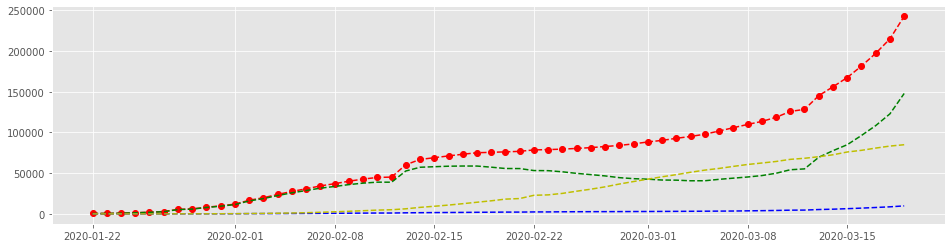

In [5]:
fig = plt.figure(figsize = (16,4))
ax1 = plt.subplot(111)
ax1.plot(df1['Confirmed'], 'ro--')
ax1.plot(df1['Infected'], 'g--')
ax1.plot(df1['Deaths'], 'b--')
ax1.plot(df1['Recovered'], 'y--')

In [13]:
forecast_col = 'Infected'
forecast_out = 7

In [14]:
df_country = df.groupby(['Country/Region', 'ObservationDate'])[Results].sum().reset_index()
print(df_country.head())

    Country/Region ObservationDate  Infected  Confirmed  Deaths  Recovered
0       Azerbaijan      2020-02-28       1.0        1.0     0.0        0.0
1  ('St. Martin',)      2020-03-10       2.0        2.0     0.0        0.0
2      Afghanistan      2020-02-24       1.0        1.0     0.0        0.0
3      Afghanistan      2020-02-25       1.0        1.0     0.0        0.0
4      Afghanistan      2020-02-26       1.0        1.0     0.0        0.0


In [15]:
df1['label'] = df1[forecast_col].shift(-forecast_out)

# Model 1

In [16]:
train_col1 = ['Infected', 'Confirmed', 'Recovered', 'Deaths']
X = np.array(df1[train_col1])
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
y = np.array(df1.dropna()['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [17]:
clf1 = LinearRegression()
clf1.fit(X_train,y_train)
forecast1 = clf1.predict(X_lately)
confidence = clf1.score(X_test, y_test)
print(confidence)

0.006376101803316492


#Model 2 

In [18]:
train_col2 = ['Infected', 'Confirmed','Rec_pct', 'Death_pct']
X = np.array(df1[train_col2])
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
y = np.array(df1.dropna()['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [19]:
clf2 = LinearRegression()
clf2.fit(X_train,y_train)
forecast2 = clf2.predict(X_lately)
confidence = clf2.score(X_test, y_test)
print(confidence)
print(np.around(forecast2))

0.9213964245272775
[169656. 192159. 214732. 240174. 267634. 296939. 337337.]


KeyError: 'Forecast'

KeyError: 'Forecast'

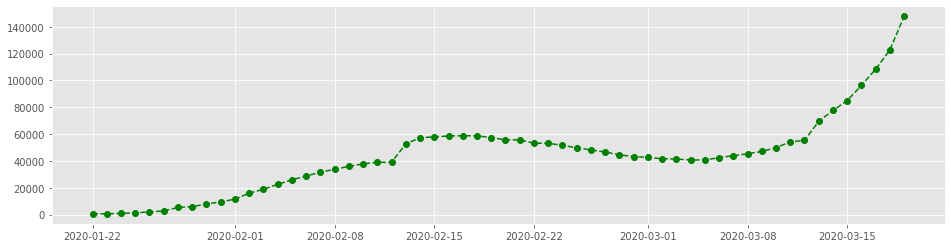